In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/scaled_mean.csv")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [3]:
import statsmodels.api as sm
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

smlog = sm.Logit(y,X).fit()
smlog.summary()

Optimization terminated successfully.
         Current function value: 0.129060
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                  0.8045
Time:                        21:16:54   Log-Likelihood:                -73.435
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.189e-124
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
radius_mean               -1.0360     10.822     -0.096      0.924     -22.247      20.175
texture_mean               1.6538      0.276      5.993      0.000       1.113       2.195
perimeter_mean            -4.0833     11.944     -0.342      0.732     -27.493      19.327
area_mean                  9.4092      2.594      3.627      0.000       4.325      14.494
smoothness_mean            1.0679      0.462      2.310      0.021       0.162       1.974
compactness_mean          -0.0789      1.091     -0.072      0.942      -2.217       2.059
concavity_mean             0.8511      0.633      1.344      0.179      -0.390       2.092
concave points_mean        2.4410      1.102      2.214      0.027       0.280       4.602
symmetry_mean              0.4529      0.295      1.536      0.125      -0.125       1.031
fractal_dimension_mean    -0.4335      0.609     -0.712      0.476      -1.627       0.760
==========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

when the p-value is greater than 0.05, we fail to reject the null hypothesis that the relationship between the patient's diagnosis and the exogenous variable is not significant.

In [4]:
data.shape

(569, 11)

In [5]:
range(1,10)

range(1, 10)

In [6]:
data.columns.to_list()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

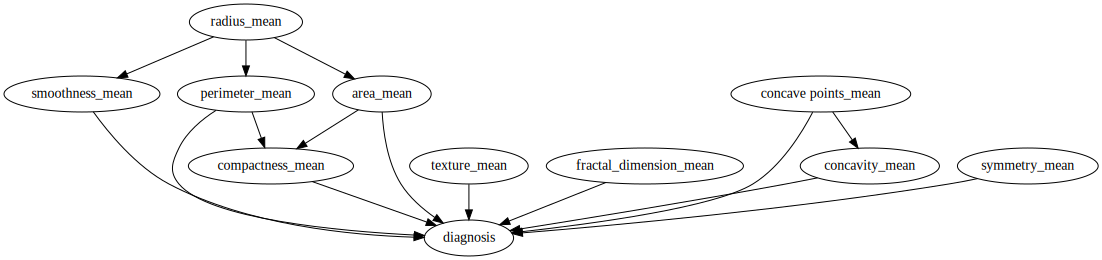

In [8]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
           'concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean","smoothness_mean"),
        ("area_mean","compactness_mean"),
        ("perimeter_mean","compactness_mean"),
        ("concave points_mean","concavity_mean"),
        ("smoothness_mean","diagnosis"),
        ("concave points_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("compactness_mean","diagnosis"),
        ("perimeter_mean", "diagnosis"),
        ("area_mean", "diagnosis"),
        ("symmetry_mean", "diagnosis"),
        ("fractal_dimension_mean", "diagnosis"),
        ("texture_mean", "diagnosis")
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()

In [ ]:
# get all the conditional independence relationships implied by a CGM
causal.get_all_independence_relationships()

In [ ]:
df = pd.read_csv('../data/scaled_data.csv')
df.head()

In [ ]:
X_train,X_hold,y_train,y_hold = train_test_split(X,y,test_size=0.2)

* Structural Causal Model (SCM) consists of a set of Endogenous (V) and a set of Exogenous (U) variables connected by a set of functions (F) that determine the values of the the variables in V based on the values of the variables in U.
* 

In [ ]:
causal = CausalGraphicalModel(
    nodes=["radius_mean","perimeter_mean","area_mean","diagnosis"],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"), 
        ("perimeter_mean", "diagnosis"),
        ("area_mean", "diagnosis"), 
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()